# Python package to collect financial metrics and ratios data
## Dr. Tirthajyoti Sarkar, Fremont, CA, June 2020

We wrote a simple Python class script for interfacing with a [financial data microservice](https://financialmodelingprep.com/).

You can pull data about and build a Pandas DataFrame with almost all important financial metrics and ratios by invoking a simple method.

We also provide simple charting methods (bar chart and scatter plots) for analyzing the data graphically.

Note that you need to obtain your own secret API key (free) from the website and register it after instantiating the class object.

In [1]:
# Main script
from financeAPI import *
# Other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen

### Read the secret API key from a file and register it

Note that you need to have a file called `Secret_Key.txt` in the same directory as the code files. Without it, you cannot progress.

**Register here: https://financialmodelingprep.com/login**

In [2]:
with open('Secret_Key.txt') as f:
    key = f.read()

In [3]:
f = FinanceAPI()

### Description of the class

In [4]:
print(f)

This is a finance API class.



### Cannot build a data dictionary without registering the secret key

In [5]:
f.build_dict('AAPL')

API key not registered yet.


### Register the key

In [6]:
f.registerKey_(key)

### Build a data dictionary for the ticker symbol 'AAPL' (Apple Inc.)

In [7]:
apple_dict=f.build_dict('AAPL')

### Browse through the dictionary

In [8]:
for k,v in apple_dict.items():
    print("{}: {}".format(k,v))

symbol: AAPL
price: 331.5
beta: 1.228499
volAvg: 46216714
mktCap: 1.4368304E12
lastDiv: 3.08
range: 185.77-331.75
changes: 9.18
changesPercentage: (+2.85%)
companyName: Apple Inc.
exchange: Nasdaq Global Select
exchangeShortName: NASDAQ
industry: Computer Hardware
website: http://www.apple.com
description: Apple Inc designs, manufactures and markets mobile communication and media devices and personal computers, and sells a variety of related software, services, accessories, networking solutions and third-party digital content and applications.
ceo: Timothy D. Cook
sector: Technology
image: https://financialmodelingprep.com/images-New-jpg/AAPL.jpg
date: 2019-09-28
Revenue per Share: 56.34113309400035
Net Income per Share: 11.965783092246278
Operating Cash Flow per Share: 15.026741974700693
Free Cash Flow per Share: 12.75403143551717
Cash per Share: 10.577253318330628
Book Value per Share: 19.59533408953202
Tangible Book Value per Share: 73.30622971722241
Shareholders Equity per Share: 1

### Build a DataFrame by passing a list of ticker symbols

In [9]:
df=f.build_dataframe(['TWTR','FB','MSFT','NVDA','AAPL','CRM'])

C:\Users\tirth\Documents\Personal\Data Science related\Python and other Notebooks\Finance\financeAPI.py:200: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  self.df.fillna(value=pd.np.nan, inplace=True)


### What kind of profile data are available?

In [10]:
f.available_data('profile')

Following data are available for profile
price, beta, volAvg, mktCap, lastDiv, range, changes, changesPercentage, companyName, exchange, exchangeShortName, industry, website, description, ceo, sector, image.

### What kind of metrics data are available?

In [11]:
f.available_data('metrics')

Following data are available for metrics
date, Revenue per Share, Net Income per Share, Operating Cash Flow per Share, Free Cash Flow per Share, Cash per Share, Book Value per Share, Tangible Book Value per Share, Shareholders Equity per Share, Interest Debt per Share, Market Cap, Enterprise Value, PE ratio, Price to Sales Ratio, POCF ratio, PFCF ratio, PB ratio, PTB ratio, EV to Sales, Enterprise Value over EBITDA, EV to Operating cash flow, EV to Free cash flow, Earnings Yield, Free Cash Flow Yield, Debt to Equity, Debt to Assets, Net Debt to EBITDA, Current ratio, Interest Coverage, Income Quality, Dividend Yield, Payout Ratio, SG&A to Revenue, R&D to Revenue, Intangibles to Total Assets, Capex to Operating Cash Flow, Capex to Revenue, Capex to Depreciation, Stock-based compensation to Revenue, Graham Number, ROIC, Return on Tangible Assets, Graham Net-Net, Working Capital, Tangible Asset Value, Net Current Asset Value, Invested Capital, Average Receivables, Average Payables, Averag

### What kind of financial ratios data are available?

In [12]:
f.available_data('ratios')

Following data are available for ratios
currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle, grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue, debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, cashFlowToDebtRatio, companyEquityMultiplier, receivablesTurnover, payablesTurnover, fixedAssetTurnover, assetTurnover, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, priceToFreeCashFlowsRatio, enterpriseValueMultiple.

### Simple bar charts

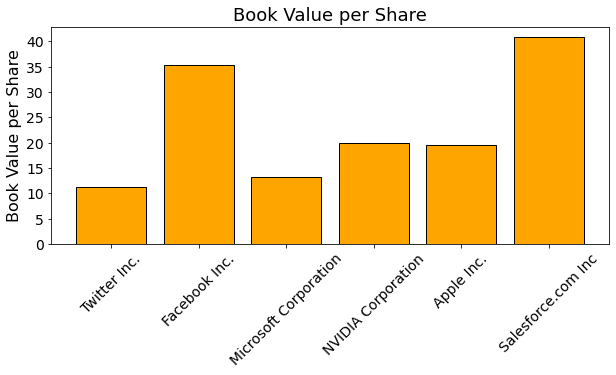

In [13]:
f.bar_chart('Book Value per Share',color='orange',edgecolor='k')

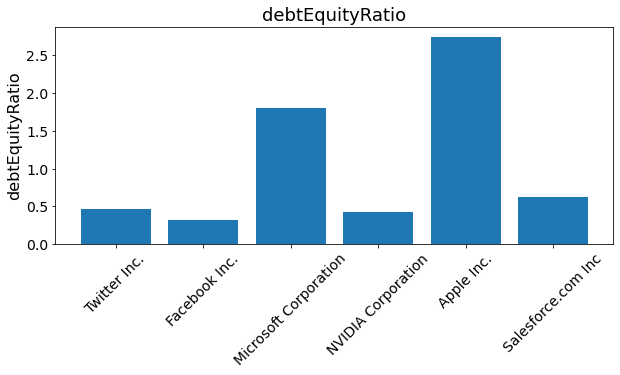

In [14]:
f.bar_chart('debtEquityRatio')

### Scatter plots

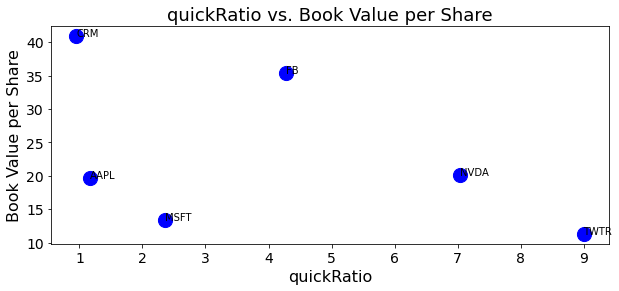

In [15]:
f.scatter('quickRatio','Book Value per Share',color='blue')

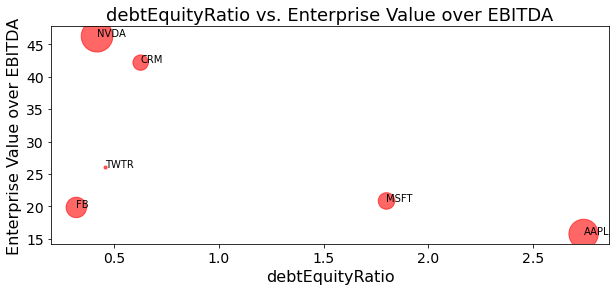

In [16]:
f.scatter(varX='debtEquityRatio',
          varY='Enterprise Value over EBITDA',
         sizeZ='price',
         color='red',alpha=0.6)

### You can work with the underlying DataFrame to create your own filter

Often, investors may want to create their own filters and investment logic with the available data. For example, we may want to consider only those companies with market capitalization > 200 billion USD and then look at the metric of _Enterprise value over EBIDTA_.

We can access the underlying DataFrame, create a custom DataFrame, and then assign this custom DataFrame to a new `financeAPI()` object to take advantage of the ready-made charting methods. In this way, we won't need to request data from the API again. **We should avoid the data read as much as possible because of the limitation of the number of data read with the free API key.**

Example code is shown below.

In [25]:
# Only companies with market cap > 200 billion USD
df = f.df
df_large_cap = df[df['Market Cap']>200e9]
df_large_cap[['companyName','Market Cap']]

,companyName,Market Cap
1,Facebook Inc.,5.979986e+11
2,Microsoft Corporation,1.076906e+12
4,Apple Inc.,1.150072e+12


In [26]:
# A fresh class declration
f2 = FinanceAPI()
# Assigning the custom DataFrame to the `df` attribute of this new class object
# Note we did not need to request data from the API again.
f2.df = df_large_cap

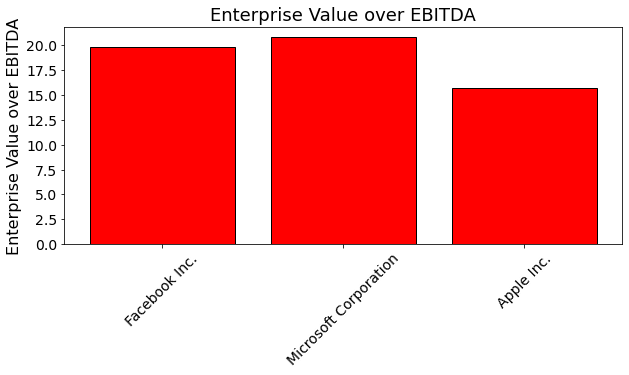

In [27]:
f2.bar_chart('Enterprise Value over EBITDA',color='red',edgecolor='k')